Entradas: Month, GHI, Wind Speed, Zenith, Azimuth, Hour Sine, Hour Cosine 

Target: Angulo

Dados de 19/10 até 18/11

In [1]:
import pandas as pd
import pvlib
import numpy as np 
import matplotlib.pyplot as plt

In [18]:
# df da nrel
df = pd.read_csv('8871462_-22.06_-48.17_2019.csv', header=2) 
df['datetime'] = pd.to_datetime(df[['Year','Month', 'Day', 'Hour', 'Minute']])
df['datetime_utc'] = df['datetime'].dt.tz_localize('UTC')
df['datetime_local'] = df['datetime_utc'].dt.tz_convert('America/Sao_Paulo')
#display(df)
# angulos calculados com pvlib
angulos = pd.read_csv('data_otimo_total_2019.csv')
#display(angulos)
thetas = pd.read_csv('backtracking.csv')
#display(thetas)
# zenite e azimute do get solar position
solpos = pd.read_csv('solarposition.csv')
#display(solpos)
# Filtrar o df e pegar dados de 19/10 até 18/11
df_mes = df[(df['datetime'] >= '2019-10-19 00:00:00') & (df['datetime'] <= '2019-11-18 23:30:00')].copy()
#display(df_mes)
angulos_mes = angulos[(angulos['datetime'] >= '2019-10-19 00:00:00') & (angulos['datetime'] <= '2019-11-18 23:30:00')].copy()
#display(angulos_mes)
df_mes['Angulo'] = angulos_mes['angulo_otimo']
thetas_mes = thetas[(thetas['datetime_local'] >= '2019-10-19 00:00:00-03:00') & (thetas['datetime_local'] <= '2019-11-18 23:30:00-03:00')].copy()
#display(thetas_mes)
solpos_mes = solpos[(solpos['datetime_local'] >= '2019-10-19 00:00:00-03:00') & (solpos['datetime_local'] <= '2019-11-18 23:30:00-03:00')].copy()
#display(solpos_mes)





,Year,Month,Day,Hour,Minute,DHI,Temperature,Wind Speed,Solar Zenith Angle,Surface Albedo,GHI,DNI,datetime,datetime_utc,datetime_local
0,2019,1,1,0,0,0,21.6,0.9,134.75,0.17,0,0,2019-01-01 00:00:00,2019-01-01 00:00:00+00:00,2018-12-31 22:00:00-02:00
1,2019,1,1,0,30,0,21.3,0.8,134.78,0.17,0,0,2019-01-01 00:30:00,2019-01-01 00:30:00+00:00,2018-12-31 22:30:00-02:00
2,2019,1,1,1,0,0,21.0,0.7,133.66,0.17,0,0,2019-01-01 01:00:00,2019-01-01 01:00:00+00:00,2018-12-31 23:00:00-02:00
3,2019,1,1,1,30,0,20.9,0.6,131.45,0.17,0,0,2019-01-01 01:30:00,2019-01-01 01:30:00+00:00,2018-12-31 23:30:00-02:00
4,2019,1,1,2,0,0,20.7,0.6,128.30,0.17,0,0,2019-01-01 02:00:00,2019-01-01 02:00:00+00:00,2019-01-01 00:00:00-02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2019,12,31,21,30,0,23.4,0.9,119.48,0.17,0,0,2019-12-31 21:30:00,2019-12-31 21:30:00+00:00,2019-12-31 18:30:00-03:00
17516,2019,12,31,22,0,0,23.1,0.9,124.08,0.17,0,0,2019-12-31 22:00:00,2019-12-31 22:00:00+00:00,2019-12-31 19:00:00-03:00
17517,2019,12,31,22,30,0,22.8,1.0,128.06,0.17,0,0,2019-12-31 22:30:00,2019-12-31 22:30:00+00:00,2019-12-31 19:30:00-03:00
17518,2019,12,31,23,0,0,22.5,1.0,131.27,0.17,0,0,2019-12-31 23:00:00,2019-12-31 23:00:00+00:00,2019-12-31 20:00:00-03:00


,Unnamed: 0,datetime,angulo_otimo,irradiancia
0,0,2019-01-01 00:00:00,15,0.0
1,1,2019-01-01 00:30:00,15,0.0
2,2,2019-01-01 01:00:00,15,0.0
3,3,2019-01-01 01:30:00,15,0.0
4,4,2019-01-01 02:00:00,15,0.0
...,...,...,...,...
17515,17515,2019-12-31 21:30:00,60,0.0
17516,17516,2019-12-31 22:00:00,15,0.0
17517,17517,2019-12-31 22:30:00,15,0.0
17518,17518,2019-12-31 23:00:00,15,0.0


,datetime_local,tracker_theta
0,2019-01-01 00:00:00-02:00,0.000000
1,2019-01-01 00:30:00-02:00,0.000000
2,2019-01-01 01:00:00-02:00,0.000000
3,2019-01-01 01:30:00-02:00,0.000000
4,2019-01-01 02:00:00-02:00,0.000000
...,...,...
17511,2019-12-31 18:30:00-03:00,5.305519
17512,2019-12-31 19:00:00-03:00,0.000000
17513,2019-12-31 19:30:00-03:00,0.000000
17514,2019-12-31 20:00:00-03:00,0.000000


,datetime_local,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
0,2019-01-01 00:00:00-02:00,130.431269,130.431269,-40.431269,-40.431269,201.247715,-3.235491
1,2019-01-01 00:30:00-02:00,132.428602,132.428602,-42.428602,-42.428602,192.435013,-3.245391
2,2019-01-01 01:00:00-02:00,133.361499,133.361499,-43.361499,-43.361499,183.099195,-3.255288
3,2019-01-01 01:30:00-02:00,133.166114,133.166114,-43.166114,-43.166114,173.623787,-3.265183
4,2019-01-01 02:00:00-02:00,131.856204,131.856204,-41.856204,-41.856204,164.429482,-3.275076
...,...,...,...,...,...,...,...
17511,2019-12-31 18:30:00-03:00,85.161122,85.330101,4.838878,4.669899,246.845935,-3.032026
17512,2019-12-31 19:00:00-03:00,91.579861,91.579861,-1.579861,-1.579861,243.925505,-3.041970
17513,2019-12-31 19:30:00-03:00,97.666672,97.666672,-7.666672,-7.666672,240.669099,-3.051912
17514,2019-12-31 20:00:00-03:00,103.550002,103.550002,-13.550002,-13.550002,237.004479,-3.061851


,Year,Month,Day,Hour,Minute,DHI,Temperature,Wind Speed,Solar Zenith Angle,Surface Albedo,GHI,DNI,datetime,datetime_utc,datetime_local
13968,2019,10,19,0,0,0,23.7,1.6,148.10,0.16,0,0,2019-10-19 00:00:00,2019-10-19 00:00:00+00:00,2019-10-18 21:00:00-03:00
13969,2019,10,19,0,30,0,23.3,1.6,147.13,0.16,0,0,2019-10-19 00:30:00,2019-10-19 00:30:00+00:00,2019-10-18 21:30:00-03:00
13970,2019,10,19,1,0,0,22.9,1.7,144.63,0.16,0,0,2019-10-19 01:00:00,2019-10-19 01:00:00+00:00,2019-10-18 22:00:00-03:00
13971,2019,10,19,1,30,0,22.5,1.8,140.88,0.16,0,0,2019-10-19 01:30:00,2019-10-19 01:30:00+00:00,2019-10-18 22:30:00-03:00
13972,2019,10,19,2,0,0,22.1,1.9,136.21,0.16,0,0,2019-10-19 02:00:00,2019-10-19 02:00:00+00:00,2019-10-18 23:00:00-03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15451,2019,11,18,21,30,0,24.2,3.0,125.06,0.17,0,0,2019-11-18 21:30:00,2019-11-18 21:30:00+00:00,2019-11-18 18:30:00-03:00
15452,2019,11,18,22,0,0,23.3,3.4,129.57,0.17,0,0,2019-11-18 22:00:00,2019-11-18 22:00:00+00:00,2019-11-18 19:00:00-03:00
15453,2019,11,18,22,30,0,22.5,3.4,133.36,0.17,0,0,2019-11-18 22:30:00,2019-11-18 22:30:00+00:00,2019-11-18 19:30:00-03:00
15454,2019,11,18,23,0,0,21.6,3.5,136.24,0.17,0,0,2019-11-18 23:00:00,2019-11-18 23:00:00+00:00,2019-11-18 20:00:00-03:00


,Unnamed: 0,datetime,angulo_otimo,irradiancia
13968,13968,2019-10-19 00:00:00,15,0.0
13969,13969,2019-10-19 00:30:00,15,0.0
13970,13970,2019-10-19 01:00:00,15,0.0
13971,13971,2019-10-19 01:30:00,15,0.0
13972,13972,2019-10-19 02:00:00,15,0.0
...,...,...,...,...
15451,15451,2019-11-18 21:30:00,60,0.0
15452,15452,2019-11-18 22:00:00,15,0.0
15453,15453,2019-11-18 22:30:00,15,0.0
15454,15454,2019-11-18 23:00:00,15,0.0


,datetime_local,tracker_theta
13970,2019-10-19 00:00:00-03:00,0.0
13971,2019-10-19 00:30:00-03:00,0.0
13972,2019-10-19 01:00:00-03:00,0.0
13973,2019-10-19 01:30:00-03:00,0.0
13974,2019-10-19 02:00:00-03:00,0.0
...,...,...
15453,2019-11-18 21:30:00-03:00,0.0
15454,2019-11-18 22:00:00-03:00,0.0
15455,2019-11-18 22:30:00-03:00,0.0
15456,2019-11-18 23:00:00-03:00,0.0


,datetime_local,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
13970,2019-10-19 00:00:00-03:00,146.554272,146.554272,-56.554272,-56.554272,176.242684,14.939577
13971,2019-10-19 00:30:00-03:00,145.314747,145.314747,-55.314747,-55.314747,163.214740,14.943520
13972,2019-10-19 01:00:00-03:00,142.648920,142.648920,-52.648920,-52.648920,151.473012,14.947459
13973,2019-10-19 01:30:00-03:00,138.833796,138.833796,-48.833796,-48.833796,141.453925,14.951393
13974,2019-10-19 02:00:00-03:00,134.156642,134.156642,-44.156642,-44.156642,133.129188,14.955323
...,...,...,...,...,...,...,...
15453,2019-11-18 21:30:00-03:00,124.927836,124.927836,-34.927836,-34.927836,221.848110,14.818052
15454,2019-11-18 22:00:00-03:00,129.190369,129.190369,-39.190369,-39.190369,214.765982,14.813566
15455,2019-11-18 22:30:00-03:00,132.701519,132.701519,-42.701519,-42.701519,206.627335,14.809074
15456,2019-11-18 23:00:00-03:00,135.283220,135.283220,-45.283220,-45.283220,197.464342,14.804576


In [19]:
colunas_desejadas = ['zenith', 'azimuth']
coluna = ['tracker_theta']
df_mes = df_mes.reset_index(drop=True)
solpos_mes = solpos_mes.reset_index(drop=True)
thetas_mes = thetas_mes.reset_index(drop=True)
df_mes[colunas_desejadas] = solpos_mes[colunas_desejadas]
df_mes[coluna] = thetas_mes[coluna]
display(solpos_mes)
display(df_mes)


,datetime_local,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
0,2019-10-19 00:00:00-03:00,146.554272,146.554272,-56.554272,-56.554272,176.242684,14.939577
1,2019-10-19 00:30:00-03:00,145.314747,145.314747,-55.314747,-55.314747,163.214740,14.943520
2,2019-10-19 01:00:00-03:00,142.648920,142.648920,-52.648920,-52.648920,151.473012,14.947459
3,2019-10-19 01:30:00-03:00,138.833796,138.833796,-48.833796,-48.833796,141.453925,14.951393
4,2019-10-19 02:00:00-03:00,134.156642,134.156642,-44.156642,-44.156642,133.129188,14.955323
...,...,...,...,...,...,...,...
1483,2019-11-18 21:30:00-03:00,124.927836,124.927836,-34.927836,-34.927836,221.848110,14.818052
1484,2019-11-18 22:00:00-03:00,129.190369,129.190369,-39.190369,-39.190369,214.765982,14.813566
1485,2019-11-18 22:30:00-03:00,132.701519,132.701519,-42.701519,-42.701519,206.627335,14.809074
1486,2019-11-18 23:00:00-03:00,135.283220,135.283220,-45.283220,-45.283220,197.464342,14.804576


,Year,Month,Day,Hour,Minute,DHI,Temperature,Wind Speed,Solar Zenith Angle,Surface Albedo,GHI,DNI,datetime,datetime_utc,datetime_local,Angulo,zenith,azimuth,tracker_theta
0,2019,10,19,0,0,0,23.7,1.6,148.10,0.16,0,0,2019-10-19 00:00:00,2019-10-19 00:00:00+00:00,2019-10-18 21:00:00-03:00,15,146.554272,176.242684,0.0
1,2019,10,19,0,30,0,23.3,1.6,147.13,0.16,0,0,2019-10-19 00:30:00,2019-10-19 00:30:00+00:00,2019-10-18 21:30:00-03:00,15,145.314747,163.214740,0.0
2,2019,10,19,1,0,0,22.9,1.7,144.63,0.16,0,0,2019-10-19 01:00:00,2019-10-19 01:00:00+00:00,2019-10-18 22:00:00-03:00,15,142.648920,151.473012,0.0
3,2019,10,19,1,30,0,22.5,1.8,140.88,0.16,0,0,2019-10-19 01:30:00,2019-10-19 01:30:00+00:00,2019-10-18 22:30:00-03:00,15,138.833796,141.453925,0.0
4,2019,10,19,2,0,0,22.1,1.9,136.21,0.16,0,0,2019-10-19 02:00:00,2019-10-19 02:00:00+00:00,2019-10-18 23:00:00-03:00,15,134.156642,133.129188,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,2019,11,18,21,30,0,24.2,3.0,125.06,0.17,0,0,2019-11-18 21:30:00,2019-11-18 21:30:00+00:00,2019-11-18 18:30:00-03:00,60,124.927836,221.848110,0.0
1484,2019,11,18,22,0,0,23.3,3.4,129.57,0.17,0,0,2019-11-18 22:00:00,2019-11-18 22:00:00+00:00,2019-11-18 19:00:00-03:00,15,129.190369,214.765982,0.0
1485,2019,11,18,22,30,0,22.5,3.4,133.36,0.17,0,0,2019-11-18 22:30:00,2019-11-18 22:30:00+00:00,2019-11-18 19:30:00-03:00,15,132.701519,206.627335,0.0
1486,2019,11,18,23,0,0,21.6,3.5,136.24,0.17,0,0,2019-11-18 23:00:00,2019-11-18 23:00:00+00:00,2019-11-18 20:00:00-03:00,15,135.283220,197.464342,0.0


Tratamento dos dados: Criar Hour_sine e Hour_cosine e normalizar os outros dados

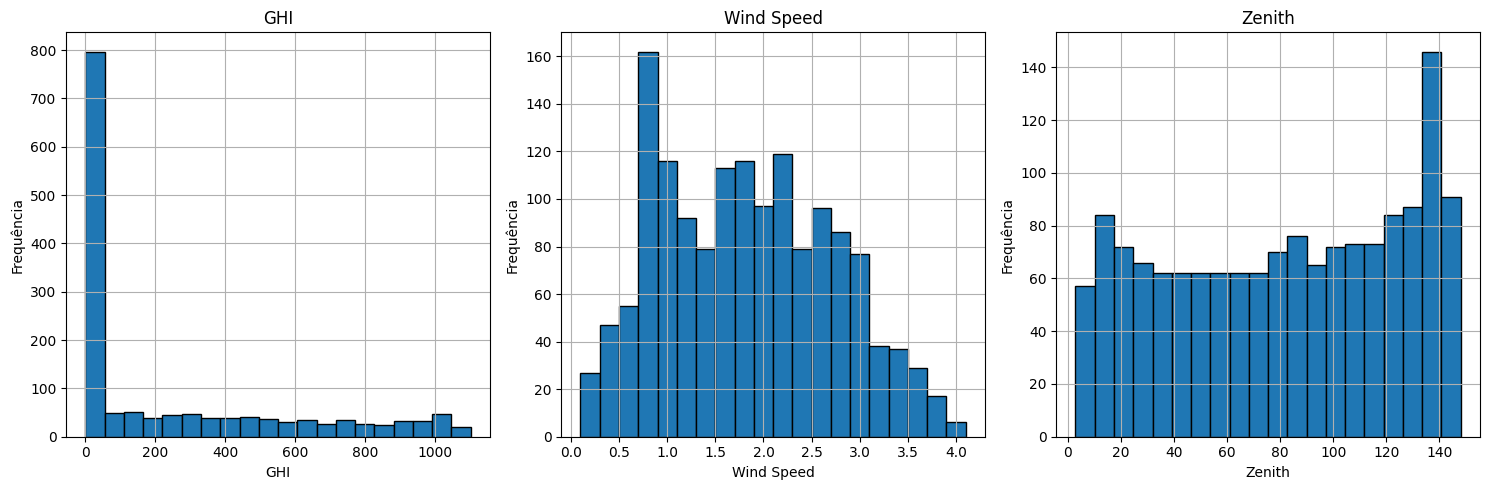

In [25]:
# Distribuição dos dados
colunas = ['GHI', 'Wind Speed', 'Solar Zenith Angle']
titulos = ['GHI', 'Wind Speed', 'Zenith']
labels = ['GHI', 'Wind Speed', 'Zenith']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, coluna, titulo, label in zip(axs, colunas, titulos, labels):
    ax.hist(df_mes[coluna], bins=20, edgecolor='black')
    ax.set_title(titulo)
    ax.set_xlabel(label)
    ax.set_ylabel('Frequência')
    ax.grid(True)
plt.tight_layout()
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler

def calcula_seno(hora,minuto):
    hour_sine = np.sin((2*np.pi*(hora*60+minuto))/1440)
    return hour_sine

def calcula_cosseno(hora,minuto):
    hour_cosine = np.cos((2*np.pi*(hora*60+minuto))/1440)
    return hour_cosine

senos = []
cossenos = []

for i, row in df_mes.iterrows(): # row representa cada linha do df
    hour_sine = calcula_seno(row['Hour'],row['Minute'])
    senos.append(hour_sine)
    hour_cosine = calcula_cosseno(row['Hour'],row['Minute'])
    cossenos.append(hour_cosine)

df_mes['Hour Sine'] = senos
df_mes['Hour Cosine'] = cossenos
display(df_mes)



cols = ['Year','Day','Hour','Minute','DHI','Temperature','Surface Albedo','DNI','datetime_utc','datetime_local','zenith']
df_mes = df_mes.drop(cols,axis=1)
display(df_mes)

,Year,Month,Day,Hour,Minute,DHI,Temperature,Wind Speed,Solar Zenith Angle,Surface Albedo,...,DNI,datetime,datetime_utc,datetime_local,Angulo,zenith,azimuth,tracker_theta,Hour Sine,Hour Cosine
0,2019,10,19,0,0,0,23.7,1.6,148.10,0.16,...,0,2019-10-19 00:00:00,2019-10-19 00:00:00+00:00,2019-10-18 21:00:00-03:00,15,146.554272,176.242684,0.0,0.000000,1.000000
1,2019,10,19,0,30,0,23.3,1.6,147.13,0.16,...,0,2019-10-19 00:30:00,2019-10-19 00:30:00+00:00,2019-10-18 21:30:00-03:00,15,145.314747,163.214740,0.0,0.130526,0.991445
2,2019,10,19,1,0,0,22.9,1.7,144.63,0.16,...,0,2019-10-19 01:00:00,2019-10-19 01:00:00+00:00,2019-10-18 22:00:00-03:00,15,142.648920,151.473012,0.0,0.258819,0.965926
3,2019,10,19,1,30,0,22.5,1.8,140.88,0.16,...,0,2019-10-19 01:30:00,2019-10-19 01:30:00+00:00,2019-10-18 22:30:00-03:00,15,138.833796,141.453925,0.0,0.382683,0.923880
4,2019,10,19,2,0,0,22.1,1.9,136.21,0.16,...,0,2019-10-19 02:00:00,2019-10-19 02:00:00+00:00,2019-10-18 23:00:00-03:00,15,134.156642,133.129188,0.0,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,2019,11,18,21,30,0,24.2,3.0,125.06,0.17,...,0,2019-11-18 21:30:00,2019-11-18 21:30:00+00:00,2019-11-18 18:30:00-03:00,60,124.927836,221.848110,0.0,-0.608761,0.793353
1484,2019,11,18,22,0,0,23.3,3.4,129.57,0.17,...,0,2019-11-18 22:00:00,2019-11-18 22:00:00+00:00,2019-11-18 19:00:00-03:00,15,129.190369,214.765982,0.0,-0.500000,0.866025
1485,2019,11,18,22,30,0,22.5,3.4,133.36,0.17,...,0,2019-11-18 22:30:00,2019-11-18 22:30:00+00:00,2019-11-18 19:30:00-03:00,15,132.701519,206.627335,0.0,-0.382683,0.923880
1486,2019,11,18,23,0,0,21.6,3.5,136.24,0.17,...,0,2019-11-18 23:00:00,2019-11-18 23:00:00+00:00,2019-11-18 20:00:00-03:00,15,135.283220,197.464342,0.0,-0.258819,0.965926


,Month,Wind Speed,Solar Zenith Angle,GHI,datetime,Angulo,azimuth,tracker_theta,Hour Sine,Hour Cosine
0,10,1.6,148.10,0,2019-10-19 00:00:00,15,176.242684,0.0,0.000000,1.000000
1,10,1.6,147.13,0,2019-10-19 00:30:00,15,163.214740,0.0,0.130526,0.991445
2,10,1.7,144.63,0,2019-10-19 01:00:00,15,151.473012,0.0,0.258819,0.965926
3,10,1.8,140.88,0,2019-10-19 01:30:00,15,141.453925,0.0,0.382683,0.923880
4,10,1.9,136.21,0,2019-10-19 02:00:00,15,133.129188,0.0,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...
1483,11,3.0,125.06,0,2019-11-18 21:30:00,60,221.848110,0.0,-0.608761,0.793353
1484,11,3.4,129.57,0,2019-11-18 22:00:00,15,214.765982,0.0,-0.500000,0.866025
1485,11,3.4,133.36,0,2019-11-18 22:30:00,15,206.627335,0.0,-0.382683,0.923880
1486,11,3.5,136.24,0,2019-11-18 23:00:00,15,197.464342,0.0,-0.258819,0.965926


In [ ]:
df_mes['Month'] = df_mes['Month'].replace({10: 0, 11: 1})

scaler = MinMaxScaler()
colunas = ['GHI', 'Wind Speed', 'Solar Zenith Angle','Solar Azimuth','Angulo']
df_mes[colunas] = scaler.fit_transform(df_mes[colunas])



In [21]:
df_mes.to_csv('df_mes.csv', index=False)